In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split # for splitting the data into training and testing sets
from sklearn.linear_model import LinearRegression, Ridge, Lasso # models we are going to use
from sklearn.metrics import r2_score # for comparing the predicted and test values


In [2]:
colnames=['Year','Month', 'Date', 'Hour', 'Minute', 'Dry_bulb_temperature', 'Dew_point_temperature', 'Apparent_temperature', 
          'Relative_humidity', 'Wind_direction', 'Average_wind-speed', 'Wind-gust', 'Mean_sea_level_pressure', 'Rainfall']

Mel = pd.read_csv('Melbourne01.txt',sep = '\s+', names=colnames, header=None)
Ade = pd.read_csv('Adelaide01.txt',sep = '\s+', names=colnames, header=None)
Mel.head()

C:\Users\wsm\Downloads\a\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (13) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Year,Month,Date,Hour,Minute,Dry_bulb_temperature,Dew_point_temperature,Apparent_temperature,Relative_humidity,Wind_direction,Average_wind-speed,Wind-gust,Mean_sea_level_pressure,Rainfall
0,2011,1,1,0,4,24.8,0.0,14.0,51.0,SE,11.0,13.0,1007.4,0.0
1,2011,1,1,0,4,24.8,0.0,14.0,51.0,SE,11.0,13.0,1007.4,0.0
2,2011,1,1,0,14,24.8,0.0,13.3,48.0,SE,11.0,11.0,1007.5,0.0
3,2011,1,1,0,14,24.8,0.0,13.3,48.0,SE,11.0,11.0,1007.5,0.0
4,2011,1,1,0,24,24.9,0.0,13.3,48.0,SE,11.0,13.0,1007.5,0.0


In [3]:
Mel.describe()

,Year,Month,Date,Hour,Minute,Dry_bulb_temperature,Dew_point_temperature,Apparent_temperature,Relative_humidity,Average_wind-speed,Wind-gust,Mean_sea_level_pressure
count,1.019654e+06,1.019654e+06,1.019654e+06,1.019654e+06,1.019654e+06,1.019654e+06,1.019654e+06,1.019654e+06,1.019654e+06,1.019654e+06,1.019654e+06,1.019654e+06
mean,2.015923e+03,6.476530e+00,1.576656e+01,1.143465e+01,2.663163e+01,1.585998e+01,1.197865e+01,8.987658e+00,6.655777e+01,1.940643e+01,2.252214e+01,1.016986e+03
std,3.087915e+00,3.479018e+00,8.818295e+00,6.884914e+00,1.721497e+01,5.638054e+00,7.174774e+00,4.082823e+00,1.768274e+01,1.455766e+01,1.892506e+01,5.114916e+01
min,2.011000e+03,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,5.000000e-01,-4.100000e+00,-8.700000e+00,0.000000e+00,-9.999000e+03,-9.999000e+03,-9.999000e+03
25%,2.013000e+03,3.000000e+00,8.000000e+00,5.000000e+00,1.000000e+01,1.190000e+01,7.500000e+00,6.000000e+00,5.500000e+01,1.100000e+01,1.300000e+01,1.012200e+03
50%,2.016000e+03,7.000000e+00,1.600000e+01,1.100000e+01,2.500000e+01,1.510000e+01,1.160000e+01,8.500000e+00,6.700000e+01,1.700000e+01,2.000000e+01,1.017400e+03
75%,2.019000e+03,1.000000e+01,2.300000e+01,1.700000e+01,4.000000e+01,1.910000e+01,1.650000e+01,1.160000e+01,8.000000e+01,2.600000e+01,3.000000e+01,1.022500e+03
max,2.022000e+03,1.200000e+01,3.100000e+01,2.300000e+01,5.900000e+01,4.350000e+01,4.330000e+01,3.690000e+01,1.000000e+02,1.000000e+02,1.090000e+02,1.039000e+03


In [4]:
Mel.drop_duplicates(inplace=True)
Mel.shape

(505356, 14)

In [5]:
Mel.dtypes

Year                         int64
Month                        int64
Date                         int64
Hour                         int64
Minute                       int64
Dry_bulb_temperature       float64
Dew_point_temperature      float64
Apparent_temperature       float64
Relative_humidity          float64
Wind_direction              object
Average_wind-speed         float64
Wind-gust                  float64
Mean_sea_level_pressure    float64
Rainfall                    object
dtype: object

In [6]:
# monthly split dataset, mean maximun and minimun temp, higherst and lowest temp,rain humidity

In [7]:
Mel.Wind_direction.unique()

array(['SE', 'ESE', 'NE', 'NNE', 'ENE', 'W', 'N', 'SW', 'SSE', 'S', 'SSW',
       'WSW', 'NW', 'WNW', 'NNW', 'E', 'CALM', '1016.6', '1016.9',
       '1017.0', '1017.4', '1026.0', '1026.1', '1025.3', '1024.2',
       '1029.6', '1003.3', '1008.2', '1019.0', '1015.5', '1014.2',
       '1015.9', '1016.2', '1016.1', '1014.1', '1014.0', '1013.6',
       '1012.7', '1013.1', '1014.4', '1014.6', '1015.6', '1015.8',
       '1016.7', '1017.2', '1016.0', '1017.8', '1019.5', '1019.8',
       '1019.9', '1020.4', '1021.0', '1021.2', '1021.7', '1021.9',
       '1022.3', '1022.7', '1004.5', '1022.0', '1010.3', '1012.0',
       '1010.8', '-'], dtype=object)

In [8]:
mask = Mel[Mel['Mean_sea_level_pressure'] <= 0.0]
mask

,Year,Month,Date,Hour,Minute,Dry_bulb_temperature,Dew_point_temperature,Apparent_temperature,Relative_humidity,Wind_direction,Average_wind-speed,Wind-gust,Mean_sea_level_pressure,Rainfall
155561,2012,9,24,13,44,14.8,6.8,0.5,37.0,1016.6,0.0,0.0,0.0,0.0
155563,2012,9,24,13,54,13.8,6.4,2.1,45.0,1016.9,0.0,0.0,0.0,0.0
155564,2012,9,24,14,14,13.4,6.8,4.2,53.0,1017.0,0.0,0.0,0.0,0.0
155565,2012,9,24,14,34,14.3,7.0,2.3,44.0,1017.0,0.0,0.0,0.0,0.0
155566,2012,9,24,15,4,13.4,5.9,1.2,43.0,1017.4,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
971472,2021,7,14,15,30,13.5,9.2,9.4,76.0,N,32.0,43.0,-9999.0,0.2
973743,2021,8,31,8,0,13.3,8.3,4.5,55.0,N,52.0,63.0,-9999.0,0.0
973744,2021,8,31,8,30,13.4,8.6,4.6,55.0,NNE,52.0,70.0,-9999.0,0.0
973745,2021,8,31,9,0,13.5,9.0,4.1,53.0,NNE,46.0,65.0,-9999.0,0.0


In [9]:
Mel.drop(Mel[Mel.Mean_sea_level_pressure <= 0.0].index, inplace=True)
Mel.describe()

,Year,Month,Date,Hour,Minute,Dry_bulb_temperature,Dew_point_temperature,Apparent_temperature,Relative_humidity,Average_wind-speed,Wind-gust,Mean_sea_level_pressure
count,505279.000000,505279.000000,505279.000000,505279.000000,505279.000000,505279.000000,505279.000000,505279.000000,505279.000000,505279.000000,505279.000000,505279.000000
mean,2016.002161,6.464470,15.744411,11.444236,26.275295,15.970959,12.086627,9.055206,66.405166,19.387770,22.530147,1017.139006
std,3.150089,3.510631,8.817435,6.883936,17.199857,5.620026,7.203014,4.087443,17.733259,17.659748,23.640971,7.576082
min,2011.000000,1.000000,1.000000,0.000000,0.000000,0.500000,-4.100000,-8.700000,0.000000,-9999.000000,-9999.000000,988.100000
25%,2013.000000,3.000000,8.000000,5.000000,10.000000,12.100000,7.600000,6.100000,55.000000,11.000000,13.000000,1012.100000
50%,2016.000000,6.000000,16.000000,11.000000,25.000000,15.200000,11.800000,8.600000,67.000000,17.000000,20.000000,1017.300000
75%,2019.000000,10.000000,23.000000,17.000000,40.000000,19.200000,16.600000,11.700000,79.000000,26.000000,30.000000,1022.400000
max,2022.000000,12.000000,31.000000,23.000000,59.000000,43.500000,43.300000,36.900000,100.000000,100.000000,109.000000,1039.000000


In [10]:
mask = Mel[Mel['Average_wind-speed'] < 0.0]
mask

,Year,Month,Date,Hour,Minute,Dry_bulb_temperature,Dew_point_temperature,Apparent_temperature,Relative_humidity,Wind_direction,Average_wind-speed,Wind-gust,Mean_sea_level_pressure,Rainfall
964665,2021,3,3,11,0,16.1,12.8,6.5,53.0,-,-9999.0,-9999.0,1020.8,0


In [11]:
Mel[Mel['Mean_sea_level_pressure'] <= 0.0]

,Year,Month,Date,Hour,Minute,Dry_bulb_temperature,Dew_point_temperature,Apparent_temperature,Relative_humidity,Wind_direction,Average_wind-speed,Wind-gust,Mean_sea_level_pressure,Rainfall


In [12]:
Mel.drop(Mel[Mel['Mean_sea_level_pressure'] <= 0].index,inplace = True)
Mel

,Year,Month,Date,Hour,Minute,Dry_bulb_temperature,Dew_point_temperature,Apparent_temperature,Relative_humidity,Wind_direction,Average_wind-speed,Wind-gust,Mean_sea_level_pressure,Rainfall
0,2011,1,1,0,4,24.8,0.0,14.0,51.0,SE,11.0,13.0,1007.4,0.0
2,2011,1,1,0,14,24.8,0.0,13.3,48.0,SE,11.0,11.0,1007.5,0.0
4,2011,1,1,0,24,24.9,0.0,13.3,48.0,SE,11.0,13.0,1007.5,0.0
6,2011,1,1,0,34,24.7,0.0,13.4,49.0,SE,11.0,11.0,1007.4,0.0
9,2011,1,1,0,44,24.1,0.0,13.3,51.0,ESE,9.0,9.0,1007.3,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1019645,2022,3,8,15,40,18.6,16.0,13.2,71.0,SSW,39.0,46.0,1018.0,0.0
1019647,2022,3,8,15,50,18.7,18.5,13.6,72.0,SSW,35.0,46.0,1017.9,0.0
1019649,2022,3,8,16,0,18.9,17.6,13.7,72.0,SSW,35.0,41.0,1017.8,0.0
1019651,2022,3,8,16,10,19.2,18.3,13.8,71.0,S,32.0,35.0,1017.8,0.0


In [13]:
Mel.drop(Mel[Mel.Mean_sea_level_pressure <= 0.0].index, inplace=True)
Mel.describe()

,Year,Month,Date,Hour,Minute,Dry_bulb_temperature,Dew_point_temperature,Apparent_temperature,Relative_humidity,Average_wind-speed,Wind-gust,Mean_sea_level_pressure
count,505279.000000,505279.000000,505279.000000,505279.000000,505279.000000,505279.000000,505279.000000,505279.000000,505279.000000,505279.000000,505279.000000,505279.000000
mean,2016.002161,6.464470,15.744411,11.444236,26.275295,15.970959,12.086627,9.055206,66.405166,19.387770,22.530147,1017.139006
std,3.150089,3.510631,8.817435,6.883936,17.199857,5.620026,7.203014,4.087443,17.733259,17.659748,23.640971,7.576082
min,2011.000000,1.000000,1.000000,0.000000,0.000000,0.500000,-4.100000,-8.700000,0.000000,-9999.000000,-9999.000000,988.100000
25%,2013.000000,3.000000,8.000000,5.000000,10.000000,12.100000,7.600000,6.100000,55.000000,11.000000,13.000000,1012.100000
50%,2016.000000,6.000000,16.000000,11.000000,25.000000,15.200000,11.800000,8.600000,67.000000,17.000000,20.000000,1017.300000
75%,2019.000000,10.000000,23.000000,17.000000,40.000000,19.200000,16.600000,11.700000,79.000000,26.000000,30.000000,1022.400000
max,2022.000000,12.000000,31.000000,23.000000,59.000000,43.500000,43.300000,36.900000,100.000000,100.000000,109.000000,1039.000000


In [14]:
mask = Mel[Mel['Average_wind-speed'] <= 0.0]
mask

,Year,Month,Date,Hour,Minute,Dry_bulb_temperature,Dew_point_temperature,Apparent_temperature,Relative_humidity,Wind_direction,Average_wind-speed,Wind-gust,Mean_sea_level_pressure,Rainfall
21,2011,1,1,1,44,23.4,0.0,13.4,53.0,ENE,0.0,0.0,1007.2,0.0
22,2011,1,1,2,14,23.7,0.0,13.8,53.0,ENE,0.0,0.0,1007.3,0.0
24,2011,1,1,2,24,23.6,0.0,13.1,51.0,W,0.0,0.0,1007.2,0.0
26,2011,1,1,2,34,23.1,0.0,13.3,54.0,W,0.0,0.0,1007.2,0.0
29,2011,1,1,2,44,22.8,0.0,13.9,57.0,W,0.0,0.0,1007.3,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1018707,2022,3,4,22,20,21.6,25.8,20.9,96.0,CALM,0.0,0.0,1008.5,1.0
1018709,2022,3,4,22,30,21.6,25.5,21.1,97.0,CALM,0.0,0.0,1008.5,1.0
1019136,2022,3,6,14,30,21.8,20.7,15.4,67.0,N,0.0,0.0,1016.2,0.0
1019362,2022,3,7,12,0,21.8,21.7,13.4,59.0,N,0.0,0.0,1014.4,0.0


In [15]:
Mel.drop(Mel[Mel['Average_wind-speed'] <= 0].index,inplace = True)
Mel

,Year,Month,Date,Hour,Minute,Dry_bulb_temperature,Dew_point_temperature,Apparent_temperature,Relative_humidity,Wind_direction,Average_wind-speed,Wind-gust,Mean_sea_level_pressure,Rainfall
0,2011,1,1,0,4,24.8,0.0,14.0,51.0,SE,11.0,13.0,1007.4,0.0
2,2011,1,1,0,14,24.8,0.0,13.3,48.0,SE,11.0,11.0,1007.5,0.0
4,2011,1,1,0,24,24.9,0.0,13.3,48.0,SE,11.0,13.0,1007.5,0.0
6,2011,1,1,0,34,24.7,0.0,13.4,49.0,SE,11.0,11.0,1007.4,0.0
9,2011,1,1,0,44,24.1,0.0,13.3,51.0,ESE,9.0,9.0,1007.3,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1019645,2022,3,8,15,40,18.6,16.0,13.2,71.0,SSW,39.0,46.0,1018.0,0.0
1019647,2022,3,8,15,50,18.7,18.5,13.6,72.0,SSW,35.0,46.0,1017.9,0.0
1019649,2022,3,8,16,0,18.9,17.6,13.7,72.0,SSW,35.0,41.0,1017.8,0.0
1019651,2022,3,8,16,10,19.2,18.3,13.8,71.0,S,32.0,35.0,1017.8,0.0


In [16]:
mask = Mel[Mel['Wind-gust'] <= 0.0]
mask

,Year,Month,Date,Hour,Minute,Dry_bulb_temperature,Dew_point_temperature,Apparent_temperature,Relative_humidity,Wind_direction,Average_wind-speed,Wind-gust,Mean_sea_level_pressure,Rainfall
54413,2011,8,13,21,0,12.1,0.0,7.3,72.0,NNE,6.0,0.0,1024.5,0.0
54678,2011,8,14,21,30,12.2,0.0,8.6,78.0,NNW,9.0,0.0,1023.9,0.2
353659,2014,11,28,7,35,13.6,12.0,8.6,72.0,CALM,7.0,0.0,1023.9,0.0
353912,2014,11,29,7,55,14.7,14.6,10.9,78.0,CALM,2.0,0.0,1017.9,0.0
354271,2014,11,30,17,15,34.5,34.3,13.1,27.0,CALM,4.0,0.0,1003.1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
937361,2020,11,15,4,50,12.5,11.5,11.1,91.0,CALM,2.0,0.0,1009.5,0.0
938297,2020,11,18,19,40,25.1,21.8,4.3,26.0,CALM,7.0,0.0,1017.8,0.0
938982,2020,11,21,11,0,20.4,19.9,12.1,59.0,CALM,2.0,0.0,1018.6,0.0
964673,2021,3,3,15,0,17.3,14.3,7.9,54.0,S,28.0,-9999.0,1019.8,0


In [17]:
Mel.drop(Mel[Mel['Wind-gust'] <= 0].index,inplace = True)
Mel

,Year,Month,Date,Hour,Minute,Dry_bulb_temperature,Dew_point_temperature,Apparent_temperature,Relative_humidity,Wind_direction,Average_wind-speed,Wind-gust,Mean_sea_level_pressure,Rainfall
0,2011,1,1,0,4,24.8,0.0,14.0,51.0,SE,11.0,13.0,1007.4,0.0
2,2011,1,1,0,14,24.8,0.0,13.3,48.0,SE,11.0,11.0,1007.5,0.0
4,2011,1,1,0,24,24.9,0.0,13.3,48.0,SE,11.0,13.0,1007.5,0.0
6,2011,1,1,0,34,24.7,0.0,13.4,49.0,SE,11.0,11.0,1007.4,0.0
9,2011,1,1,0,44,24.1,0.0,13.3,51.0,ESE,9.0,9.0,1007.3,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1019645,2022,3,8,15,40,18.6,16.0,13.2,71.0,SSW,39.0,46.0,1018.0,0.0
1019647,2022,3,8,15,50,18.7,18.5,13.6,72.0,SSW,35.0,46.0,1017.9,0.0
1019649,2022,3,8,16,0,18.9,17.6,13.7,72.0,SSW,35.0,41.0,1017.8,0.0
1019651,2022,3,8,16,10,19.2,18.3,13.8,71.0,S,32.0,35.0,1017.8,0.0


In [18]:
Mel.drop(Mel[Mel.Rainfall == "-"].index, inplace=True)
Mel.Rainfall = pd.to_numeric(Mel.Rainfall)
Mel.describe()

,Year,Month,Date,Hour,Minute,Dry_bulb_temperature,Dew_point_temperature,Apparent_temperature,Relative_humidity,Average_wind-speed,Wind-gust,Mean_sea_level_pressure,Rainfall
count,490368.000000,490368.000000,490368.000000,490368.000000,490368.000000,490368.000000,490368.000000,490368.000000,490368.000000,490368.000000,490368.000000,490368.000000,490368.000000
mean,2016.001372,6.475930,15.718132,11.475268,26.279280,16.015086,12.086340,9.023293,66.089620,19.991472,23.250428,1017.060193,0.783805
std,3.148962,3.516858,8.807164,6.866601,17.199447,5.633975,7.214267,4.082687,17.689026,10.248905,12.267774,7.548872,2.968532
min,2011.000000,1.000000,1.000000,0.000000,0.000000,0.500000,-4.100000,-8.700000,0.000000,2.000000,2.000000,988.100000,0.000000
25%,2013.000000,3.000000,8.000000,6.000000,10.000000,12.100000,7.600000,6.100000,54.000000,13.000000,13.000000,1012.100000,0.000000
50%,2016.000000,7.000000,16.000000,12.000000,25.000000,15.300000,11.700000,8.600000,67.000000,19.000000,20.000000,1017.200000,0.000000
75%,2019.000000,10.000000,23.000000,17.000000,40.000000,19.200000,16.600000,11.700000,79.000000,26.000000,30.000000,1022.300000,0.200000
max,2022.000000,12.000000,31.000000,23.000000,59.000000,43.500000,43.300000,36.900000,100.000000,89.000000,109.000000,1039.000000,54.600000


In [19]:
Mel

,Year,Month,Date,Hour,Minute,Dry_bulb_temperature,Dew_point_temperature,Apparent_temperature,Relative_humidity,Wind_direction,Average_wind-speed,Wind-gust,Mean_sea_level_pressure,Rainfall
0,2011,1,1,0,4,24.8,0.0,14.0,51.0,SE,11.0,13.0,1007.4,0.0
2,2011,1,1,0,14,24.8,0.0,13.3,48.0,SE,11.0,11.0,1007.5,0.0
4,2011,1,1,0,24,24.9,0.0,13.3,48.0,SE,11.0,13.0,1007.5,0.0
6,2011,1,1,0,34,24.7,0.0,13.4,49.0,SE,11.0,11.0,1007.4,0.0
9,2011,1,1,0,44,24.1,0.0,13.3,51.0,ESE,9.0,9.0,1007.3,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1019645,2022,3,8,15,40,18.6,16.0,13.2,71.0,SSW,39.0,46.0,1018.0,0.0
1019647,2022,3,8,15,50,18.7,18.5,13.6,72.0,SSW,35.0,46.0,1017.9,0.0
1019649,2022,3,8,16,0,18.9,17.6,13.7,72.0,SSW,35.0,41.0,1017.8,0.0
1019651,2022,3,8,16,10,19.2,18.3,13.8,71.0,S,32.0,35.0,1017.8,0.0


In [20]:
Mel.isnull().values.sum()

0

In [21]:
Mel

,Year,Month,Date,Hour,Minute,Dry_bulb_temperature,Dew_point_temperature,Apparent_temperature,Relative_humidity,Wind_direction,Average_wind-speed,Wind-gust,Mean_sea_level_pressure,Rainfall
0,2011,1,1,0,4,24.8,0.0,14.0,51.0,SE,11.0,13.0,1007.4,0.0
2,2011,1,1,0,14,24.8,0.0,13.3,48.0,SE,11.0,11.0,1007.5,0.0
4,2011,1,1,0,24,24.9,0.0,13.3,48.0,SE,11.0,13.0,1007.5,0.0
6,2011,1,1,0,34,24.7,0.0,13.4,49.0,SE,11.0,11.0,1007.4,0.0
9,2011,1,1,0,44,24.1,0.0,13.3,51.0,ESE,9.0,9.0,1007.3,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1019645,2022,3,8,15,40,18.6,16.0,13.2,71.0,SSW,39.0,46.0,1018.0,0.0
1019647,2022,3,8,15,50,18.7,18.5,13.6,72.0,SSW,35.0,46.0,1017.9,0.0
1019649,2022,3,8,16,0,18.9,17.6,13.7,72.0,SSW,35.0,41.0,1017.8,0.0
1019651,2022,3,8,16,10,19.2,18.3,13.8,71.0,S,32.0,35.0,1017.8,0.0


### TimeStamp

In [22]:
Mel['Time'] = pd.to_datetime({'year': Mel['Year'],
                                     'month': Mel['Month'],
                                     'day': Mel['Date'],
                                      'hour': Mel['Hour'],
                                     'minute': Mel['Minute']})

Mel = Mel[['Time','Dry_bulb_temperature','Dew_point_temperature','Apparent_temperature','Relative_humidity',
           'Wind_direction','Average_wind-speed',
                              'Wind-gust','Mean_sea_level_pressure','Rainfall']]


In [23]:
Mel = Mel.set_index('Time')
Mel

,Dry_bulb_temperature,Dew_point_temperature,Apparent_temperature,Relative_humidity,Wind_direction,Average_wind-speed,Wind-gust,Mean_sea_level_pressure,Rainfall
Time,,,,,,,,,
2011-01-01 00:04:00,24.8,0.0,14.0,51.0,SE,11.0,13.0,1007.4,0.0
2011-01-01 00:14:00,24.8,0.0,13.3,48.0,SE,11.0,11.0,1007.5,0.0
2011-01-01 00:24:00,24.9,0.0,13.3,48.0,SE,11.0,13.0,1007.5,0.0
2011-01-01 00:34:00,24.7,0.0,13.4,49.0,SE,11.0,11.0,1007.4,0.0
2011-01-01 00:44:00,24.1,0.0,13.3,51.0,ESE,9.0,9.0,1007.3,0.0
...,...,...,...,...,...,...,...,...,...
2022-03-08 15:40:00,18.6,16.0,13.2,71.0,SSW,39.0,46.0,1018.0,0.0
2022-03-08 15:50:00,18.7,18.5,13.6,72.0,SSW,35.0,46.0,1017.9,0.0
2022-03-08 16:00:00,18.9,17.6,13.7,72.0,SSW,35.0,41.0,1017.8,0.0


In [24]:
Mel['Rainfall'].isnull().sum()

0

In [25]:
Mel['Wind_direction'].unique()

array(['SE', 'ESE', 'NE', 'NNE', 'ENE', 'SW', 'SSE', 'S', 'SSW', 'WSW',
       'NW', 'WNW', 'W', 'NNW', 'N', 'E'], dtype=object)

In [26]:
d={'N':0,
   'NNE':22.5,
   "NE":45,
   "ENE":67.5, 
   'E':90,
   'ESE':112.5,
   'SE':135,
   'SSE':157.5,
   'S':180,
   'SSW':202.5,
   'SW':225,
   'WSW':247.5,
   'W':270,
   'WNW':292.5,
   'NW':315,
   'NNW':337.5,
   'N':0,
   'North':0,
   'East':90,
   'West':270,
   'South':180,
   'CALM':360,
   '-':360}

In [27]:
Mel['Wind_direction']=Mel['Wind_direction'].str.strip().replace(d)
Mel['Wind_direction'].unique()

array([135. , 112.5,  45. ,  22.5,  67.5, 225. , 157.5, 180. , 202.5,
       247.5, 315. , 292.5, 270. , 337.5,   0. ,  90. ])

In [28]:
Mel

,Dry_bulb_temperature,Dew_point_temperature,Apparent_temperature,Relative_humidity,Wind_direction,Average_wind-speed,Wind-gust,Mean_sea_level_pressure,Rainfall
Time,,,,,,,,,
2011-01-01 00:04:00,24.8,0.0,14.0,51.0,135.0,11.0,13.0,1007.4,0.0
2011-01-01 00:14:00,24.8,0.0,13.3,48.0,135.0,11.0,11.0,1007.5,0.0
2011-01-01 00:24:00,24.9,0.0,13.3,48.0,135.0,11.0,13.0,1007.5,0.0
2011-01-01 00:34:00,24.7,0.0,13.4,49.0,135.0,11.0,11.0,1007.4,0.0
2011-01-01 00:44:00,24.1,0.0,13.3,51.0,112.5,9.0,9.0,1007.3,0.0
...,...,...,...,...,...,...,...,...,...
2022-03-08 15:40:00,18.6,16.0,13.2,71.0,202.5,39.0,46.0,1018.0,0.0
2022-03-08 15:50:00,18.7,18.5,13.6,72.0,202.5,35.0,46.0,1017.9,0.0
2022-03-08 16:00:00,18.9,17.6,13.7,72.0,202.5,35.0,41.0,1017.8,0.0


In [29]:
mel_data= Mel

In [30]:
import numpy as np
Theta =np.pi/180*mel_data['Wind_direction'].astype(float)
mel_data['WindSpeed_x']=mel_data['Average_wind-speed']*np.sin(Theta)
mel_data['WindSpeed_y']=mel_data['Average_wind-speed']*np.cos(Theta)
mel_data['WindGust_x']=mel_data['Wind-gust']*np.sin(Theta)
mel_data['WindGust_y']=mel_data['Wind-gust']*np.cos(Theta)

In [31]:
mel_data

,Dry_bulb_temperature,Dew_point_temperature,Apparent_temperature,Relative_humidity,Wind_direction,Average_wind-speed,Wind-gust,Mean_sea_level_pressure,Rainfall,WindSpeed_x,WindSpeed_y,WindGust_x,WindGust_y
Time,,,,,,,,,,,,,
2011-01-01 00:04:00,24.8,0.0,14.0,51.0,135.0,11.0,13.0,1007.4,0.0,7.778175e+00,-7.778175,9.192388e+00,-9.192388
2011-01-01 00:14:00,24.8,0.0,13.3,48.0,135.0,11.0,11.0,1007.5,0.0,7.778175e+00,-7.778175,7.778175e+00,-7.778175
2011-01-01 00:24:00,24.9,0.0,13.3,48.0,135.0,11.0,13.0,1007.5,0.0,7.778175e+00,-7.778175,9.192388e+00,-9.192388
2011-01-01 00:34:00,24.7,0.0,13.4,49.0,135.0,11.0,11.0,1007.4,0.0,7.778175e+00,-7.778175,7.778175e+00,-7.778175
2011-01-01 00:44:00,24.1,0.0,13.3,51.0,112.5,9.0,9.0,1007.3,0.0,8.314916e+00,-3.444151,8.314916e+00,-3.444151
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-03-08 15:40:00,18.6,16.0,13.2,71.0,202.5,39.0,46.0,1018.0,0.0,-1.492465e+01,-36.031302,-1.760344e+01,-42.498458
2022-03-08 15:50:00,18.7,18.5,13.6,72.0,202.5,35.0,46.0,1017.9,0.0,-1.339392e+01,-32.335784,-1.760344e+01,-42.498458
2022-03-08 16:00:00,18.9,17.6,13.7,72.0,202.5,35.0,41.0,1017.8,0.0,-1.339392e+01,-32.335784,-1.569002e+01,-37.879061


In [32]:
mel_data.isnull().sum().sum()

0

In [33]:
mel_data['Rainfall'].isnull().sum()

0

In [34]:
mel_data['Average_wind-speed']=np.sqrt(mel_data['WindSpeed_x']**2+mel_data['WindSpeed_y']**2)
mel_data['Wind-gust']=np.sqrt(mel_data['WindGust_x']**2+mel_data['WindGust_y']**2)
mel_data['Wind_direction']=22.5*np.around(180/(22.5*np.pi)
                                            *np.arctan2(mel_data['WindSpeed_x'],mel_data['WindSpeed_y']**2))
mel_data['Wind_direction']=mel_data['Wind_direction']%360
mel_data.drop(columns=['WindSpeed_x','WindSpeed_y','WindGust_x','WindGust_y'],inplace=True)

In [35]:
MRS = mel_data.describe()
MRS

,Dry_bulb_temperature,Dew_point_temperature,Apparent_temperature,Relative_humidity,Wind_direction,Average_wind-speed,Wind-gust,Mean_sea_level_pressure,Rainfall
count,490368.000000,490368.000000,490368.000000,490368.000000,490368.000000,490368.000000,490368.000000,490368.000000,490368.000000
mean,16.015086,12.086340,9.023293,66.089620,65.157581,19.991472,23.250428,1017.060193,0.783805
std,5.633975,7.214267,4.082687,17.689026,125.486746,10.248905,12.267774,7.548872,2.968532
min,0.500000,-4.100000,-8.700000,0.000000,0.000000,2.000000,2.000000,988.100000,0.000000
25%,12.100000,7.600000,6.100000,54.000000,0.000000,13.000000,13.000000,1012.100000,0.000000
50%,15.300000,11.700000,8.600000,67.000000,0.000000,19.000000,20.000000,1017.200000,0.000000
75%,19.200000,16.600000,11.700000,79.000000,0.000000,26.000000,30.000000,1022.300000,0.200000
max,43.500000,43.300000,36.900000,100.000000,337.500000,89.000000,109.000000,1039.000000,54.600000


In [36]:
MelbourneDailyMax = mel_data.resample('D').max()
MelbourneDailyMin = mel_data.resample('D').min()
MelbourneDailyMean = mel_data.resample('D').mean()

In [37]:
MelbourneDailyMax

,Dry_bulb_temperature,Dew_point_temperature,Apparent_temperature,Relative_humidity,Wind_direction,Average_wind-speed,Wind-gust,Mean_sea_level_pressure,Rainfall
Time,,,,,,,,,
2011-01-01,24.9,0.0,14.9,80.0,337.5,37.0,43.0,1015.2,0.0
2011-01-02,21.4,0.0,11.4,71.0,0.0,33.0,39.0,1017.6,0.0
2011-01-03,20.3,0.0,7.1,57.0,22.5,35.0,41.0,1018.5,0.0
2011-01-04,21.5,0.0,12.4,85.0,337.5,30.0,37.0,1016.3,0.0
2011-01-05,21.3,0.0,13.2,79.0,337.5,32.0,37.0,1012.4,0.0
...,...,...,...,...,...,...,...,...,...
2022-03-04,32.4,32.3,21.1,99.0,337.5,39.0,46.0,1013.0,3.8
2022-03-05,21.9,24.5,20.8,100.0,337.5,37.0,43.0,1011.9,37.8
2022-03-06,21.5,21.6,18.3,100.0,0.0,48.0,57.0,1019.4,4.8


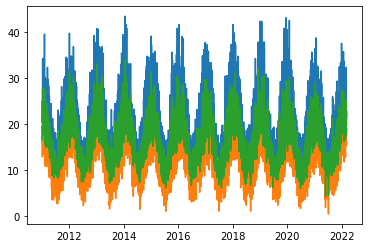

In [38]:
import matplotlib.pyplot as plt
plt.plot(MelbourneDailyMax.Dry_bulb_temperature)
plt.plot(MelbourneDailyMin.Dry_bulb_temperature)
plt.plot(MelbourneDailyMean.Dry_bulb_temperature)

In [39]:
MelbourneMonthlyMax = mel_data.resample('M').max()
MelbourneMonthlyMin = mel_data.resample('M').min()
MelbourneMonthlyMean = mel_data.resample('M').mean()

In [40]:
MelbourneMonthlyMax

,Dry_bulb_temperature,Dew_point_temperature,Apparent_temperature,Relative_humidity,Wind_direction,Average_wind-speed,Wind-gust,Mean_sea_level_pressure,Rainfall
Time,,,,,,,,,
2011-01-31,37.7,0.0,23.8,100.0,337.5,54.0,63.0,1022.8,28.0
2011-02-28,39.6,0.0,23.1,97.0,337.5,52.0,65.0,1028.5,15.4
2011-03-31,32.4,0.0,19.5,98.0,337.5,63.0,72.0,1028.2,11.2
2011-04-30,26.2,0.0,16.3,97.0,337.5,50.0,56.0,1031.9,47.2
2011-05-31,21.3,0.0,14.9,96.0,337.5,50.0,67.0,1032.6,21.2
...,...,...,...,...,...,...,...,...,...
2021-11-30,31.2,29.2,18.9,100.0,337.5,65.0,82.0,1026.6,45.4
2021-12-31,37.6,35.4,18.6,100.0,337.5,63.0,80.0,1022.7,11.8
2022-01-31,36.9,37.0,22.2,100.0,337.5,52.0,65.0,1028.1,38.6


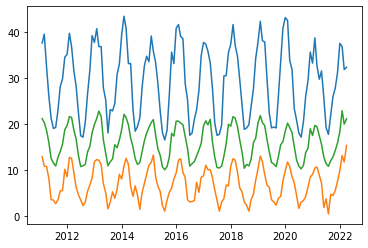

In [41]:
import matplotlib.pyplot as plt
plt.plot(MelbourneMonthlyMax.Dry_bulb_temperature)
plt.plot(MelbourneMonthlyMin.Dry_bulb_temperature)
plt.plot(MelbourneMonthlyMean.Dry_bulb_temperature)

In [42]:
def plt_correlation_matrix(corrs):
    '''Uses the seaborn heatmap to plot the correlation matrix of a pandas dataframe''' 
    # as this is a symmetric table, set up a mask so that we only plot values 
    # below the main diagonal
    mask = np.triu(np.ones_like(corrs, dtype=np.bool))
    f, ax = plt.subplots(figsize=(10, 8)) # initialise the plots and axes
    # plot the correlations as a seaborn heatmap, with a colourbar
    sns.heatmap(corrs, mask=mask, center=0, annot=True, square=True, linewidths=.5) 
    # do some fiddling so that the top and bottom are not obscured
    bottom, top = ax.get_ylim() 
    ax.set_ylim(bottom + 0.5, top - 0.5)

<ipython-input-42-0c079bed5704>:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(corrs, dtype=np.bool))


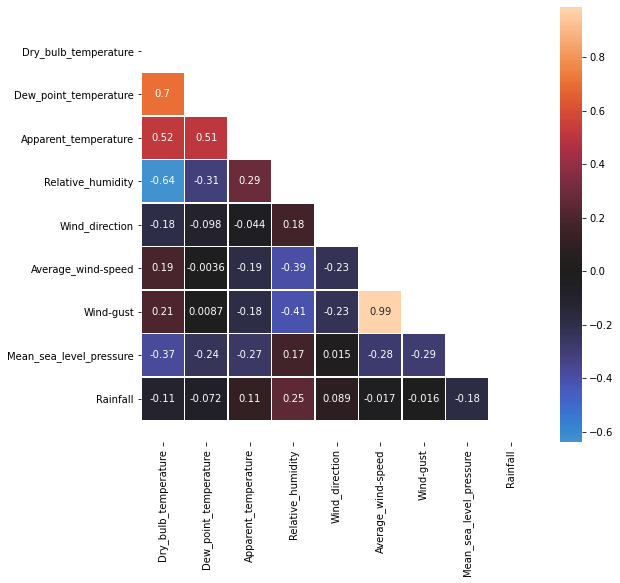

In [43]:
plt_correlation_matrix(mel_data.corr()) 

In [44]:
X = mel_data.drop(['Rainfall'],axis=1) # drop Y from our dataframe
Y = mel_data['Rainfall']

In [45]:
nX =(X-X.mean())/X.std() # create nX, a normalised version of X
nX.describe() # show the descriptive statistics of nX

,Dry_bulb_temperature,Dew_point_temperature,Apparent_temperature,Relative_humidity,Wind_direction,Average_wind-speed,Wind-gust,Mean_sea_level_pressure
count,4.903680e+05,4.903680e+05,4.903680e+05,4.903680e+05,4.903680e+05,4.903680e+05,4.903680e+05,4.903680e+05
mean,-2.908731e-14,1.265469e-13,2.881106e-13,-1.435395e-14,-2.131367e-14,9.284679e-15,7.315599e-15,5.576423e-13
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.753843e+00,-2.243657e+00,-4.341085e+00,-3.736193e+00,-5.192387e-01,-1.755453e+00,-1.732216e+00,-3.836360e+00
25%,-6.949065e-01,-6.218705e-01,-7.160218e-01,-6.834532e-01,-5.192387e-01,-6.821676e-01,-8.355573e-01,-6.570773e-01
50%,-1.269238e-01,-5.355217e-02,-1.036799e-01,5.146578e-02,-5.192387e-01,-9.673928e-02,-2.649567e-01,1.852031e-02
75%,5.653050e-01,6.256575e-01,6.556239e-01,7.298525e-01,-5.192387e-01,5.862605e-01,5.501872e-01,6.941179e-01
max,4.878423e+00,4.326657e+00,6.828030e+00,1.917029e+00,2.170288e+00,6.733258e+00,6.989823e+00,2.906369e+00


In [46]:
X_train, X_test, Y_train, Y_test = train_test_split(nX,Y,test_size=0.8, random_state=42) 
linear = LinearRegression() # instantatiate the linear regression model
linear.fit(X_train,Y_train) # fit the data to the model
training_score = linear.score(X_train,Y_train) # calculate rsq for the training set
# use the independent variables for the testing set to predict the target variable
preds_linear = linear.predict(X_test) 
# calculate the correlation of the predicted and actual target variables
rsquared_linear = r2_score(Y_test,preds_linear) 
# print the training and testing scores
print("Training score is",round(training_score,4))
print("Testing score is",round(rsquared_linear,4))

Training score is 0.1341
Testing score is 0.1304


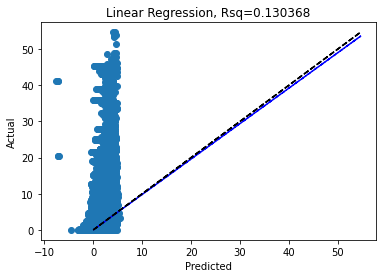

In [47]:
plt.scatter(preds_linear,Y_test) # scatter plot of predicted values against actual values
# use numpy polyfit and poly1d to create a function for the line of best fit, then plot this function in blue
p1 = np.poly1d(np.polyfit(preds_linear, Y_test, 1))
plt.plot(Y_test,p1(Y_test),'b--')
plt.title("Linear Regression, Rsq=%f" % rsquared_linear) # add a title including the correlation coefficient
plt.xlabel("Predicted") # xlabel
plt.ylabel("Actual") # ylabel
plt.plot(Y_test,Y_test,'k--') # add x=y line in black for comparison
plt.show() # display the final plot

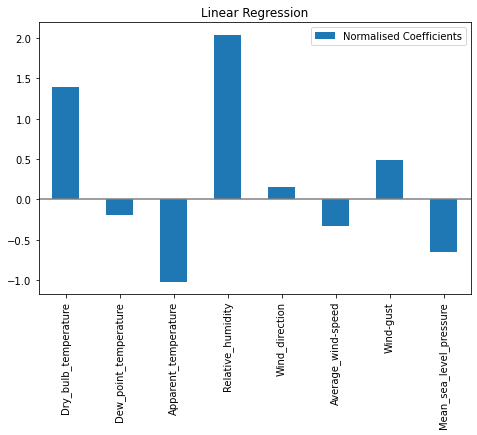

In [48]:
feature_names = X.columns.tolist() # write the column names to a list
# create a new dataframe with the regression coefficients from the normalised data
ncoefs = pd.DataFrame(linear.coef_.transpose(),columns=['Normalised'],index=feature_names) 
# add our original coefficient importance to this dataframe
ncoefs.columns =['Normalised Coefficients'] 
# do a similar horizontal plot as before
ax = ncoefs.plot(kind='bar',figsize=(10,5))
plt.title('Linear Regression')
plt.axhline(y=0, color='.5')
plt.subplots_adjust(left=.3)


In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import timedelta
from pandas.plotting import register_matplotlib_converters
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX
register_matplotlib_converters()
from time import time

In [50]:
Melbourne_rs_weekly=Mel.resample('7D').mean()

In [51]:
Melbourne_rs_weekly.loc[Melbourne_rs_weekly['Rainfall'].isnull(),'value_is_NaN'] = 1
Melbourne_rs_weekly.loc[Melbourne_rs_weekly['Rainfall'].notnull(), 'value_is_NaN'] = 0
Melbourne_rs_weekly

,Dry_bulb_temperature,Dew_point_temperature,Apparent_temperature,Relative_humidity,Wind_direction,Average_wind-speed,Wind-gust,Mean_sea_level_pressure,Rainfall,value_is_NaN
Time,,,,,,,,,,
2011-01-01,19.886698,0.000000,10.357993,55.613769,29.746208,20.508751,24.032672,1011.925321,0.000000,0.0
2011-01-08,23.058960,0.000000,18.834337,78.589603,43.861149,17.823529,20.815321,1009.153215,4.984952,0.0
2011-01-15,20.252645,0.000000,12.908690,63.867758,40.947733,18.206549,21.326196,1009.909068,0.056423,0.0
2011-01-22,20.309960,0.000000,12.826560,63.624170,74.521912,15.223108,17.686587,1012.663214,0.409031,0.0
2011-01-29,24.586376,0.000000,14.720503,57.530423,46.994048,18.255291,21.089947,1011.902116,0.137566,0.0
...,...,...,...,...,...,...,...,...,...,...
2022-02-05,20.802673,19.593318,11.447327,57.591314,50.462138,17.587973,20.337416,1017.668151,0.000000,0.0
2022-02-12,20.730394,19.814037,12.972158,62.810905,60.400232,18.661253,21.685615,1016.790023,0.036891,0.0
2022-02-19,19.008902,18.120347,12.477341,67.080925,55.404624,16.995376,19.862428,1015.571792,0.092948,0.0


In [52]:
Melbourne_rs_weekly.drop(Melbourne_rs_weekly[Melbourne_rs_weekly['value_is_NaN'] == 1.0].index,inplace = True)
Melbourne_rs_weekly

,Dry_bulb_temperature,Dew_point_temperature,Apparent_temperature,Relative_humidity,Wind_direction,Average_wind-speed,Wind-gust,Mean_sea_level_pressure,Rainfall,value_is_NaN
Time,,,,,,,,,,
2011-01-01,19.886698,0.000000,10.357993,55.613769,29.746208,20.508751,24.032672,1011.925321,0.000000,0.0
2011-01-08,23.058960,0.000000,18.834337,78.589603,43.861149,17.823529,20.815321,1009.153215,4.984952,0.0
2011-01-15,20.252645,0.000000,12.908690,63.867758,40.947733,18.206549,21.326196,1009.909068,0.056423,0.0
2011-01-22,20.309960,0.000000,12.826560,63.624170,74.521912,15.223108,17.686587,1012.663214,0.409031,0.0
2011-01-29,24.586376,0.000000,14.720503,57.530423,46.994048,18.255291,21.089947,1011.902116,0.137566,0.0
...,...,...,...,...,...,...,...,...,...,...
2022-02-05,20.802673,19.593318,11.447327,57.591314,50.462138,17.587973,20.337416,1017.668151,0.000000,0.0
2022-02-12,20.730394,19.814037,12.972158,62.810905,60.400232,18.661253,21.685615,1016.790023,0.036891,0.0
2022-02-19,19.008902,18.120347,12.477341,67.080925,55.404624,16.995376,19.862428,1015.571792,0.092948,0.0


In [53]:
Melbourne_rs_weekly=Melbourne_rs_weekly.drop('value_is_NaN', axis = 1)
Melbourne_rs_weekly

,Dry_bulb_temperature,Dew_point_temperature,Apparent_temperature,Relative_humidity,Wind_direction,Average_wind-speed,Wind-gust,Mean_sea_level_pressure,Rainfall
Time,,,,,,,,,
2011-01-01,19.886698,0.000000,10.357993,55.613769,29.746208,20.508751,24.032672,1011.925321,0.000000
2011-01-08,23.058960,0.000000,18.834337,78.589603,43.861149,17.823529,20.815321,1009.153215,4.984952
2011-01-15,20.252645,0.000000,12.908690,63.867758,40.947733,18.206549,21.326196,1009.909068,0.056423
2011-01-22,20.309960,0.000000,12.826560,63.624170,74.521912,15.223108,17.686587,1012.663214,0.409031
2011-01-29,24.586376,0.000000,14.720503,57.530423,46.994048,18.255291,21.089947,1011.902116,0.137566
...,...,...,...,...,...,...,...,...,...
2022-02-05,20.802673,19.593318,11.447327,57.591314,50.462138,17.587973,20.337416,1017.668151,0.000000
2022-02-12,20.730394,19.814037,12.972158,62.810905,60.400232,18.661253,21.685615,1016.790023,0.036891
2022-02-19,19.008902,18.120347,12.477341,67.080925,55.404624,16.995376,19.862428,1015.571792,0.092948


In [57]:
def parser(s):
    return datetime.strptime(s, '%Y-%m-%d')

In [58]:
start_date = datetime(2011,1,1)
end_date = datetime(2021,1,1)
lim_rainfall = Rainfall[start_date:end_date]

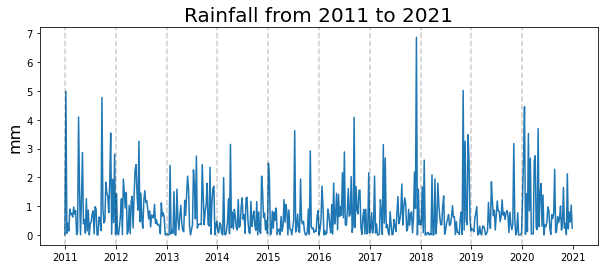

In [59]:
plt.figure(figsize=(10,4))
plt.plot(lim_rainfall)
plt.title('Rainfall from 2011 to 2021', fontsize=20)
plt.ylabel('mm', fontsize=16)
for year in range(start_date.year,end_date.year):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)

In [70]:
start_date = datetime(2011,1,1)
end_date = datetime(2021,1,1)
lim_rainfall = Rainfall[start_date:end_date]

In [71]:
first_diff = lim_rainfall.diff()[1:]

In [142]:
first_diff

Time
2011-01-08    4.984952
2011-01-15   -4.928529
2011-01-22    0.352607
2011-01-29   -0.271464
2011-02-05    0.758510
                ...   
2020-11-28   -1.914098
2020-12-05    0.582276
2020-12-12   -0.344720
2020-12-19    0.591744
2020-12-26   -0.804791
Freq: W-SAT, Name: Rainfall, Length: 521, dtype: float64

In [129]:
train_start = datetime(2011,12,31)

train_end = datetime(2020,1,1)
test_end = datetime(2021,1,1)

train_data =first_diff[train_start:train_end]
test_data = first_diff[train_end:test_end]

In [125]:
len(train_data),len(test_data),len(Rainfall)

(469, 52, 584)

In [131]:
train_data

Time
2011-01-08    4.984952
2011-01-15   -4.928529
2011-01-22    0.352607
2011-01-29   -0.271464
2011-02-05    0.758510
                ...   
2019-11-30    0.663263
2019-12-07   -0.768730
2019-12-14    0.000000
2019-12-21    0.000000
2019-12-28    0.074424
Freq: W-SAT, Name: Rainfall, Length: 469, dtype: float64

In [127]:
test_data

Time
2020-01-04    1.216732
2020-01-11    1.415328
2020-01-18    1.743515
2020-01-25   -4.432727
2020-02-01    1.413514
2020-02-08   -1.314701
2020-02-15    3.404910
2020-02-22   -2.686115
2020-02-29    1.826877
2020-03-07   -2.628047
2020-03-14   -0.002275
2020-03-21    0.007670
2020-03-28    2.531800
2020-04-04    0.177584
2020-04-11   -2.498377
2020-04-18   -0.069338
2020-04-25    3.511044
2020-05-02   -3.410276
2020-05-09    1.119194
2020-05-16    0.380975
2020-05-23   -1.483399
2020-05-30    1.089442
2020-06-06   -1.385130
2020-06-13    0.340731
2020-06-20   -0.049352
2020-06-27    0.157233
2020-07-04    0.519528
2020-07-11   -0.120533
2020-07-18   -0.606410
2020-07-25   -0.226329
2020-08-01    0.685824
2020-08-08   -0.133999
2020-08-15    0.186089
2020-08-22    1.522200
2020-08-29   -2.199319
2020-09-05    0.066483
2020-09-12    0.492453
2020-09-19   -0.209523
2020-09-26    0.144412
2020-10-03    0.433863
2020-10-10   -0.838040
2020-10-17    0.228926
2020-10-24    1.253248
2020-1

In [128]:
Rainfall

Time
2011-01-01    0.000000
2011-01-08    4.984952
2011-01-15    0.056423
2011-01-22    0.409031
2011-01-29    0.137566
                ...   
2022-02-05    0.000000
2022-02-12    0.036891
2022-02-19    0.092948
2022-02-26    0.259294
2022-03-05    3.481624
Freq: W-SAT, Name: Rainfall, Length: 584, dtype: float64

Find the p,d,q value respectively by iteration

In [157]:
from statsmodels.tsa.arima_model import ARIMA

In [106]:
model=ARIMA(train_data,order=(5,0,4)).fit()

C:\Users\wsm\Downloads\a\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\wsm\Downloads\a\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warn

In [107]:
import warnings
warnings.filterwarnings('ignore')

In [120]:
from sklearn.metrics import mean_squared_error

In [116]:
rmse=[]
order1=[]

In [117]:
for pdq in pdq_combination:
    try:
        model=ARIMA(train_data,order=pdq).fit()
        pred=model.predict(start=len(train_data),end=(len(Rainfall)-1))
        error=np.sqrt(mean_square_error(test_data,pred))
        order1.append(pdq)
        rmse.append(error)
    except:
        continue
        

In [118]:
order1

[]

In [102]:
results=pd.DataFrame(index=order1,data=rmse,columns=['RMSE'])

In [103]:
results

,RMSE


Read the resample data

In [132]:
Rainfall

Time
2011-01-01    0.000000
2011-01-08    4.984952
2011-01-15    0.056423
2011-01-22    0.409031
2011-01-29    0.137566
                ...   
2022-02-05    0.000000
2022-02-12    0.036891
2022-02-19    0.092948
2022-02-26    0.259294
2022-03-05    3.481624
Freq: W-SAT, Name: Rainfall, Length: 584, dtype: float64

Train test split

In [137]:
len(Rainfall)

584

In [138]:
Rainfall

Time
2011-01-01    0.000000
2011-01-08    4.984952
2011-01-15    0.056423
2011-01-22    0.409031
2011-01-29    0.137566
                ...   
2022-02-05    0.000000
2022-02-12    0.036891
2022-02-19    0.092948
2022-02-26    0.259294
2022-03-05    3.481624
Freq: W-SAT, Name: Rainfall, Length: 584, dtype: float64

In [154]:
train=Rainfall[:522]
test=Rainfall[522:]

In [155]:
train

Time
2011-01-01    0.000000
2011-01-08    4.984952
2011-01-15    0.056423
2011-01-22    0.409031
2011-01-29    0.137566
                ...   
2020-11-28    0.209344
2020-12-05    0.791619
2020-12-12    0.446900
2020-12-19    1.038644
2020-12-26    0.233853
Freq: W-SAT, Name: Rainfall, Length: 522, dtype: float64

In [156]:
test

Time
2021-01-02    1.988751
2021-01-09    0.081678
2021-01-16    0.147170
2021-01-23    3.665578
2021-01-30    2.440608
                ...   
2022-02-05    0.000000
2022-02-12    0.036891
2022-02-19    0.092948
2022-02-26    0.259294
2022-03-05    3.481624
Freq: W-SAT, Name: Rainfall, Length: 62, dtype: float64

Fit model with parameter p,d,q

In [158]:
from statsmodels.tsa.arima_model import ARIMA

In [164]:
model=ARIMA(train,order=(5,0,4)).fit()

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [166]:
pred=model.predict(start=len(train),end=(len(Rainfall)-1))

In [167]:
from sklearn.metrics import mean_squared_error

In [170]:
error=np.sqrt(mean_squared_error(test,pred))
error

1.0236388541279275

<AxesSubplot:xlabel='Time'>

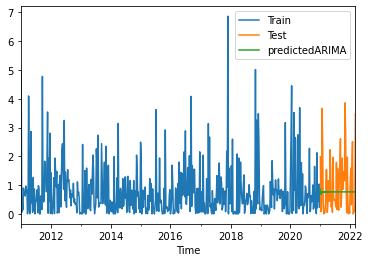

In [174]:
train.plot(legend=True,label='Train')
test.plot(legend=True,label='Test')
pred.plot(legend=True,label='predictedARIMA')

In [175]:
import itertools

In [176]:
p=range(0,8)
d=range(0,8)
q=range(0,2)

In [182]:
pdq_combination =list(itertools.product(p,d,q))

In [188]:
rmse=[]
order1=[]

In [190]:
for pdq in pdq_combination:
    try:
        model=ARIMA(train,order=pdq).fit()
        pred=model.predict(start=len(train),end=(len(Rainfall)-1))
        error=np.sqrt(mean_square_error(test,pred))
        order1.append(pdq)
        rmse.append(error)
    except:
        continue
   
    
    
      

In [195]:
results

,RMSE
"(0, 0, 0)",1.025132
"(0, 0, 1)",1.024700
"(0, 1, 0)",1.415248
"(0, 1, 1)",1.406115
"(0, 2, 0)",1.423498
"(0, 2, 1)",1.401040
